In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib.transforms import Affine2D

In [4]:
df = pd.read_csv('drugAddiction.csv',encoding='unicode_escape')
df.tail()

,Age,Gender,Education,Enjoyable with-,Live with,Conflict with law,Motive about drug,Spend most time,Failure in life,Mental/emotional problem,...,friends houses at night,Satisfied with workplace,Case in court,Living with drug user,Smoking,Ever taken drug,Friends influence,If chance given to taste drugs,Easy to control use of drug,Frequency of drug usage
206,between 22 to 35 years,Male,Undergraduate,One drug,Hostel/Hall,No,Social trend,Friends,Yes,Depression/ inferiority/Guilt,...,"Yes, often I do.",No,No,No,"Yes, every day.",Yes,"Yes, often they do",I'll try,"Yes, It's possible",Never/ Not applicable
207,between 22 to 35 years,Male,Undergraduate,One drug,Hostel/Hall,Yes,Social trend,Friends,No,Anger,...,Sometimes,Yes,No,No,"Yes, every day.",Yes,"Yes, often they do",I'll try,"Yes, It's possible",Occasionally
208,between 22 to 35 years,Male,Postgraduate (MSc/PhD),One drug,Hostel/Hall,No,Social trend,Alone,Yes,Tension/Anxiety,...,Sometimes,No,No,No,"Yes, every day.",Yes,"Yes, often they do",I'll try,"Yes, It's possible",Occasionally
209,between 22 to 35 years,Female,Postgraduate (MSc/PhD),I have no idea,With Family/Relatives,No,"Disease, Should avoid",Family/ Relatives,No,Tension/Anxiety,...,Sometimes,Yes,No,No,"No, I don't",No,"No, they don't","no, i'll not","Yes, It's possible",Never/ Not applicable
210,between 22 to 35 years,Female,Undergraduate,I have no idea,Hostel/Hall,No,Should avoid,Alone,Yes,"Depression/ inferiority/Guilt, Tension/Anxiety...",...,"No, I don't",No,No,No,"No, I don't",No,"No, they don't",i don't know/ confused,"Yes, It's possible",Never/ Not applicable


In [5]:
df.shape

(211, 26)

In [6]:
df.describe()

,Age,Gender,Education,Enjoyable with-,Live with,Conflict with law,Motive about drug,Spend most time,Failure in life,Mental/emotional problem,...,friends houses at night,Satisfied with workplace,Case in court,Living with drug user,Smoking,Ever taken drug,Friends influence,If chance given to taste drugs,Easy to control use of drug,Frequency of drug usage
count,211,211,211,211,211,211,211,211,211,196,...,211,211,211,211,211,211,211,211,211,211
unique,4,2,5,3,2,2,7,3,2,16,...,3,2,2,3,3,2,2,3,2,4
top,between 22 to 35 years,Male,Undergraduate,I have no idea,With Family/Relatives,No,Should avoid,Friends,Yes,Depression/ inferiority/Guilt,...,Sometimes,Yes,No,No,"Yes, every day.",No,"No, they don't","no, i'll not","Yes, It's possible",Never/ Not applicable
freq,122,142,132,122,130,159,83,127,109,44,...,111,132,184,125,90,114,134,83,157,110


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211 entries, 0 to 210
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Age                             211 non-null    object
 1   Gender                          211 non-null    object
 2   Education                       211 non-null    object
 3   Enjoyable with-                 211 non-null    object
 4   Live with                       211 non-null    object
 5   Conflict with law               211 non-null    object
 6   Motive about drug               211 non-null    object
 7   Spend most time                 211 non-null    object
 8   Failure in life                 211 non-null    object
 9   Mental/emotional problem        196 non-null    object
 10  Suicidal thoughts               211 non-null    object
 11  Family relationship             211 non-null    object
 12  Financials of family            211 non-null    ob

In [8]:
df['Mental/emotional problem'].unique()

array(['Depression/ inferiority/Guilt',
       'Depression/ inferiority/Guilt, Tension/Anxiety, Anger',
       'Tension/Anxiety',
       'Depression/ inferiority/Guilt, Tension/Anxiety', 'Anger', nan,
       'Depression/ inferiority/Guilt, Tension/Anxiety, Anger, Others',
       'Tension/Anxiety, Anger',
       'Depression/ inferiority/Guilt, Tension/Anxiety, Others',
       'Depression/ inferiority/Guilt, Tension/Anxiety, Anger, Others, None',
       'Depression/ inferiority/Guilt, Anger', 'Tension/Anxiety, Others',
       'Depression/ inferiority/Guilt, Anger, Others', 'Anger, Others',
       'Others', 'Depression/ inferiority/Guilt, Others',
       'Tension/Anxiety, Anger, Others'], dtype=object)

In [9]:
df["Suicidal thoughts"] = (df["Suicidal thoughts"] == 'Yes').astype(int) 

In [10]:
df['Family relationship'].unique()

array(['Satisfactory', 'Average', 'Communcaiton gap'], dtype=object)

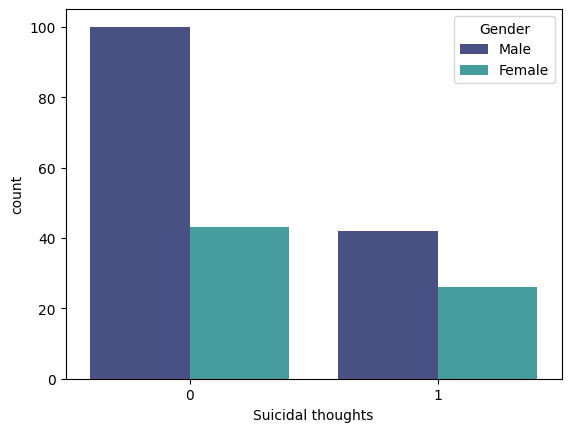

In [11]:
y = sns.countplot(x='Suicidal thoughts',hue='Gender',data=df,palette='mako')

Sucicdial thoughts:
* 1 = Yes
* 2 = No

From the above plot we see suicidal thoughts are more in Male compared to Female.

In [12]:
# y.figure.savefig("output6")

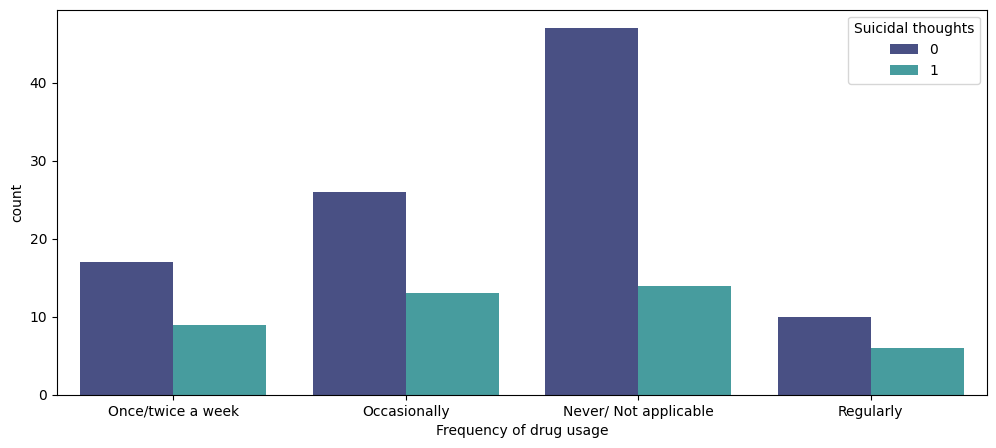

In [13]:
df01 = df.melt( id_vars=['Frequency of drug usage'],value_vars=['Suicidal thoughts'], var_name='cols',  value_name='vals')
plt.figure(figsize=(12,5))
g =sns.countplot(x="Frequency of drug usage", hue='vals', data=df01[((df['Gender']=="Male"))], palette='mako')
new_legend_title = 'Suicidal thoughts'
g.legend().set_title(new_legend_title)

In [14]:
# g.figure.savefig("output7")

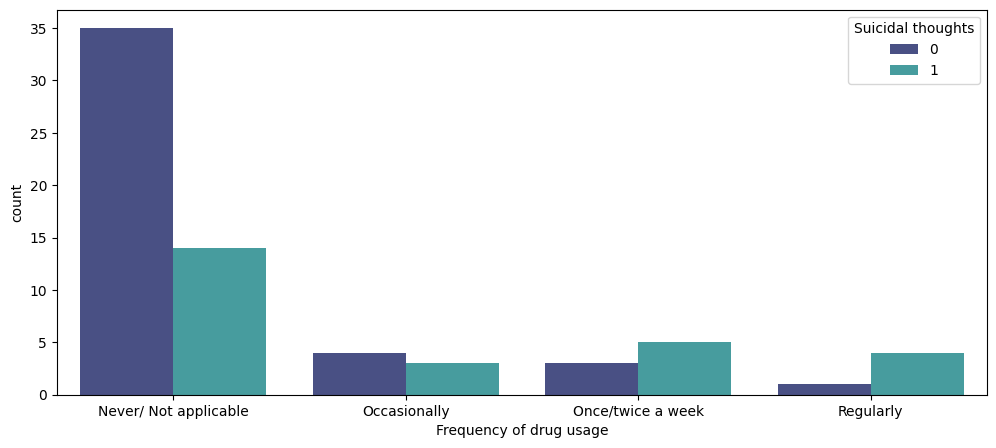

In [15]:
df01 = df.melt( id_vars=['Frequency of drug usage'],value_vars=['Suicidal thoughts'], var_name='cols',  value_name='vals')
plt.figure(figsize=(12,5))
g =sns.countplot(x="Frequency of drug usage", hue='vals', data=df01[((df['Gender']=="Female"))], palette='mako')
new_legend_title = 'Suicidal thoughts'
g.legend().set_title(new_legend_title)

In [16]:
# g.figure.savefig("output8")

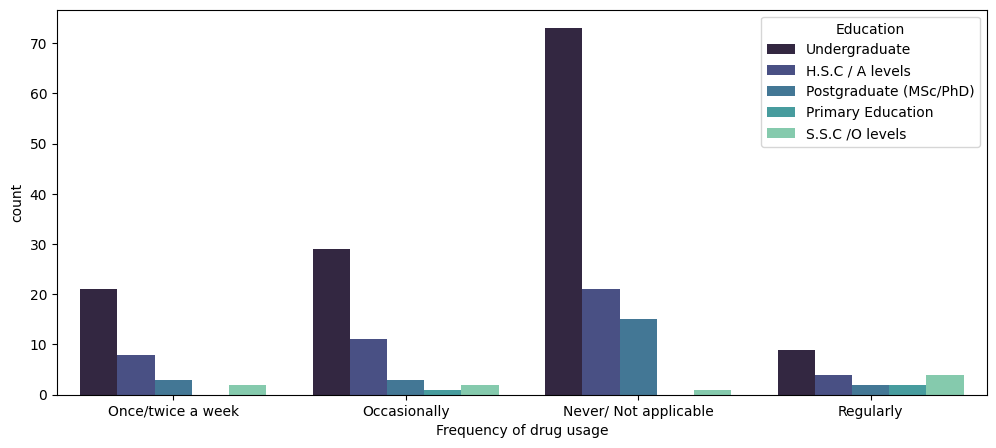

In [17]:
df01 = df.melt( id_vars=['Frequency of drug usage'],value_vars=['Education'], var_name='cols',  value_name='vals')
plt.figure(figsize=(12,5))
g =sns.countplot(x="Frequency of drug usage", hue='vals', data=df01, palette='mako')
new_legend_title = 'Education'
g.legend().set_title(new_legend_title)

From the above plot we see Regular usage of Drug is more common in undergraduates than compared to others

In [18]:
# g.figure.savefig("output3")

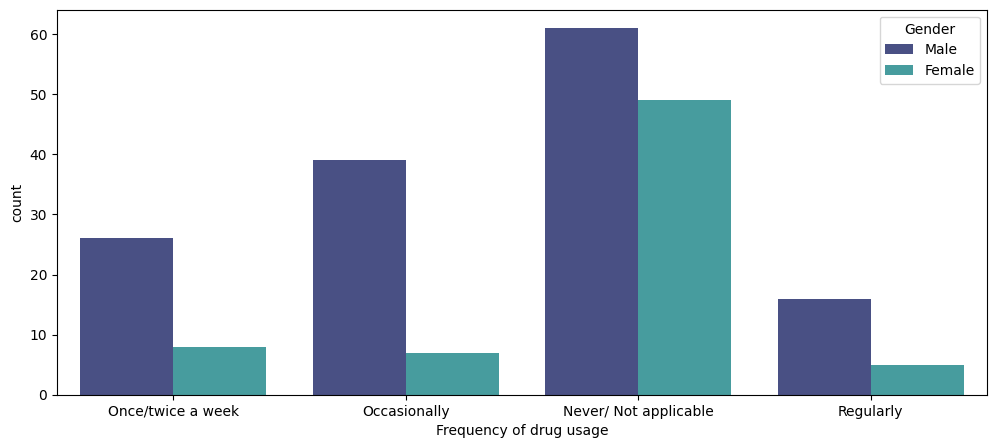

In [19]:
df01 = df.melt( id_vars=['Frequency of drug usage'],value_vars=['Gender'], var_name='cols',  value_name='vals')
plt.figure(figsize=(12,5))
g =sns.countplot(x="Frequency of drug usage", hue='vals', data=df01, palette='mako')
new_legend_title = 'Gender'
g.legend().set_title(new_legend_title)

From the above plot we see Regularly usage of drug is more in Male compared to Female.

In [20]:
# g.figure.savefig("output5")

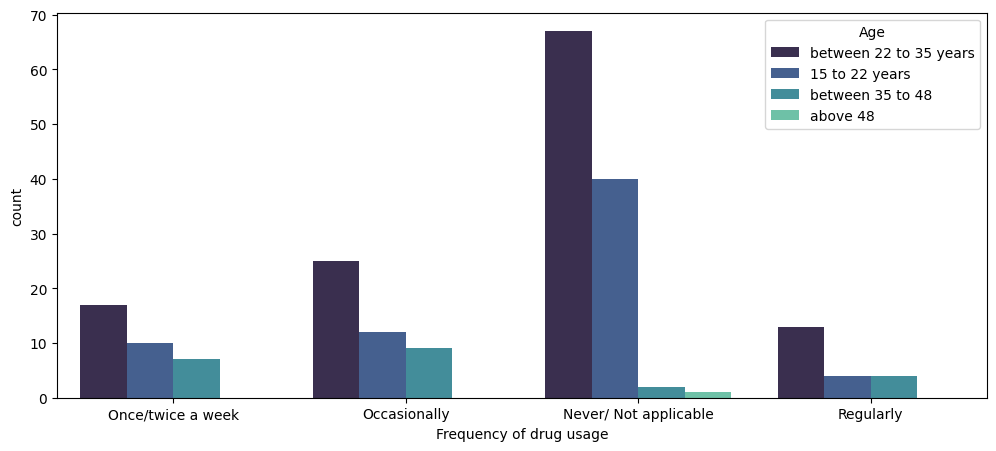

In [21]:
df01 = df.melt( id_vars=['Frequency of drug usage'],value_vars=['Age'], var_name='cols',  value_name='vals')
plt.figure(figsize=(12,5))
g =sns.countplot(x="Frequency of drug usage", hue='vals', data=df01, palette='mako')
new_legend_title = 'Age'
g.legend().set_title(new_legend_title)

From the above plot we see Regularly usage of drug is more between age group of 22 to 35

In [22]:
# g.figure.savefig("output2")

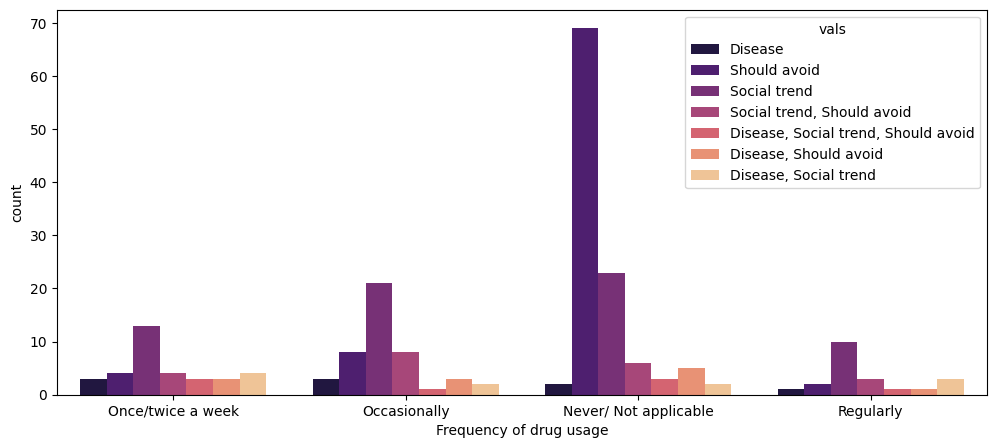

In [23]:
df01 = df.melt( id_vars=['Frequency of drug usage'],value_vars=['Motive about drug'], var_name='cols',  value_name='vals')
plt.figure(figsize=(12,5))
g =sns.countplot(x="Frequency of drug usage", hue='vals', data=df01,palette='magma')

From the above plot we see Regularly usage of drug is more in people who are influenced by social trends

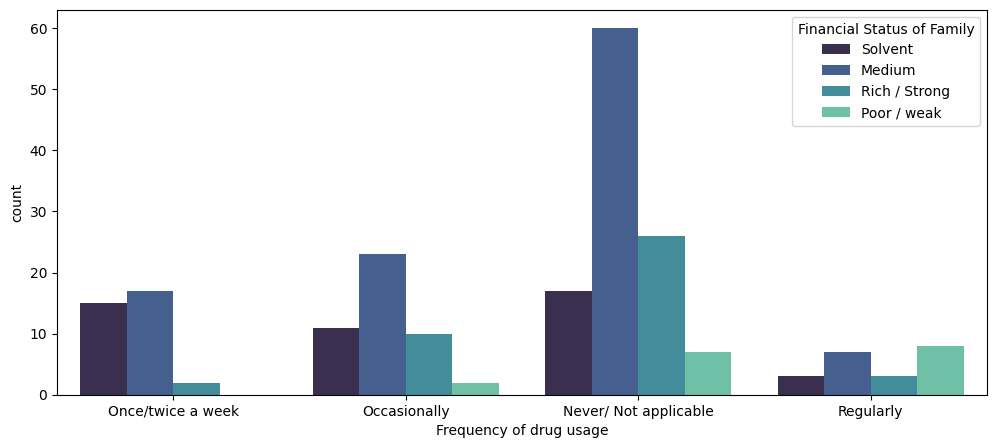

In [24]:
df01 = df.melt( id_vars=['Frequency of drug usage'],value_vars=['Financials of family'], var_name='cols',  value_name='vals')
plt.figure(figsize=(12,5))

g =sns.countplot(x="Frequency of drug usage", hue='vals', data=df01, palette='mako')
new_legend_title = 'Financial Status of Family'
g.legend().set_title(new_legend_title)

In [25]:
g.figure.savefig("output1")

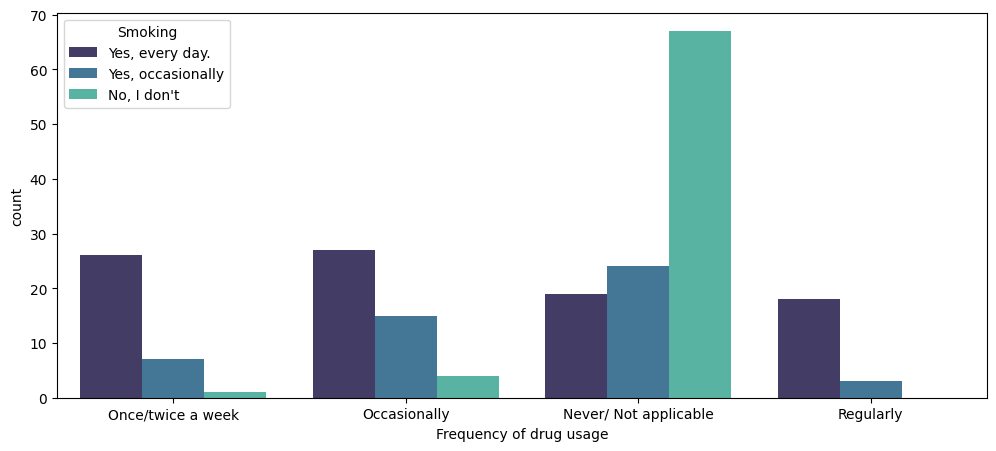

In [26]:
df01 = df.melt( id_vars=['Frequency of drug usage'],value_vars=['Smoking'], var_name='cols',  value_name='vals')
plt.figure(figsize=(12,5))
g =sns.countplot(x="Frequency of drug usage", hue='vals', data=df01, palette='mako')
new_legend_title = 'Smoking'
g.legend().set_title(new_legend_title)

In [27]:
# g.figure.savefig("output4")

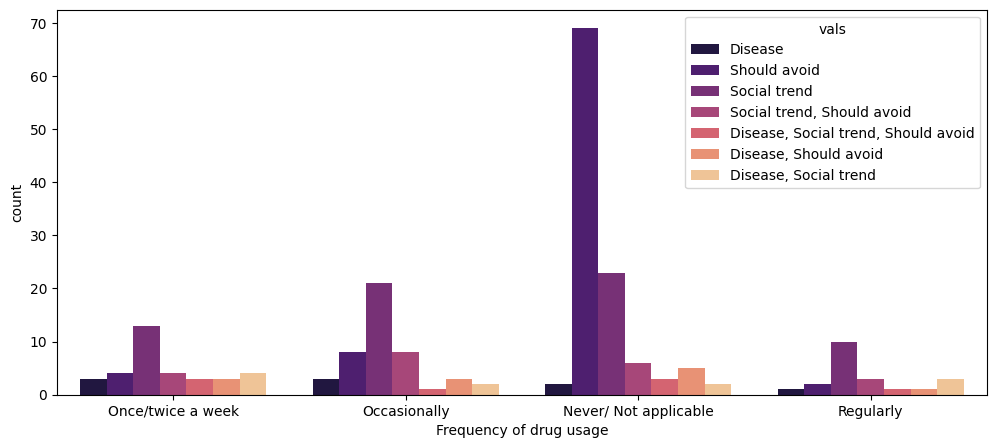

In [28]:
df01 = df.melt( id_vars=['Frequency of drug usage'],value_vars=['Motive about drug'], var_name='cols',  value_name='vals')
plt.figure(figsize=(12,5))
g =sns.countplot(x="Frequency of drug usage", hue='vals', data=df01,palette='magma')

In [29]:
# from sklearn.preprocessing import StandardScaler
# from imblearn.over_sampling import RandomOverSampler

In [30]:
# train,valid,test = np.split(df.sample(frac=1), [int (0.6*len(df)), int(0.8*len(df))])

In [31]:
# def scale_dataset(dataframe,oversample=False):
#     X = dataframe[dataframe.columns[:-1]].values
#     Y = dataframe[dataframe.columns[-1]].values
    
#     scaler = StandardScaler()
#     X = scaler.fit_transform(X)
#     if oversample:
#         ros = RandomOverSampler()
#         X,Y = ros.fit_resample(X,Y)
#     data = np.hstack((X,np.reshape(Y,(-1,1))))
    
#     return data,X,Y

In [32]:
# print(len(train[train["Suicidal thoughts"]==1]))
# print(len(train[train["Suicidal thoughts"]==0]))

In [33]:
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.metrics import classification_report

In [34]:
# pip install autogluon

In [35]:
# from autogluon.tabular import TabularDataset , TabularPredictor

In [36]:
# from sklearn.model_selection import train_test_split

# train_df , test_df = train_test_split(df , test_size = 0.2)

In [37]:
# predictor = TabularPredictor(path = './' , label = 'Frequency of drug usage').fit(train_df)

In [38]:
# predictor.evaluate(test_df)

In [39]:
# predictor.predict(test_df)

In [40]:
# predictor.predict_proba(test_df)

In [41]:
# predictor.leaderboard()